In [54]:
import pandas as pd

In [55]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score


#Loading the dataset

In [57]:
df=pd.read_csv("Telco_Customer_Churn_Dataset  (3).csv")


In [58]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [59]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [60]:
df.shape

(7043, 21)

In [61]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [62]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [63]:
df.columns = df.columns.str.strip()


In [64]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


#Data Splitting

#EDA

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns 

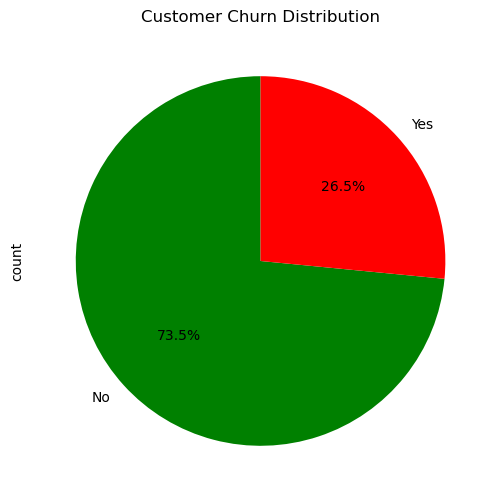

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [68]:
plt.figure(figsize=(6,6))
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%', labels=['No','Yes'], colors=['green','red'], startangle=90)
plt.title("Customer Churn Distribution")
plt.show()

print(df['Churn'].value_counts())


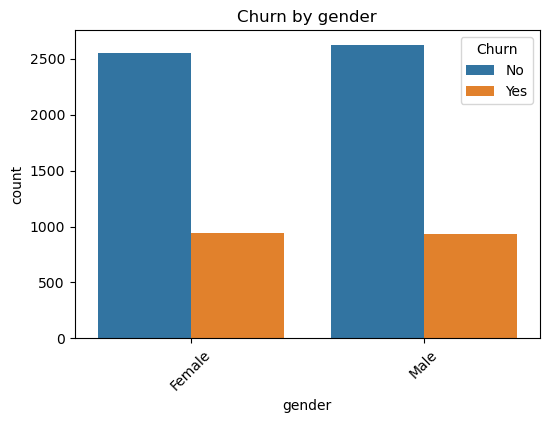

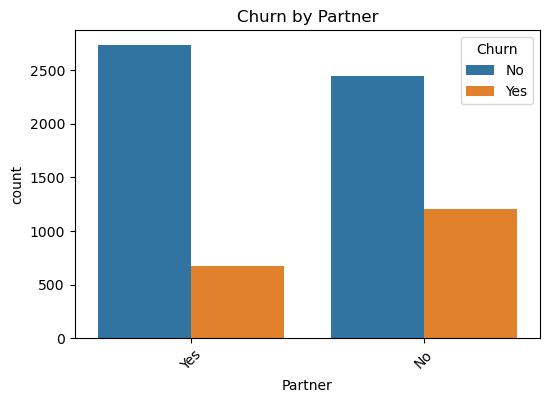

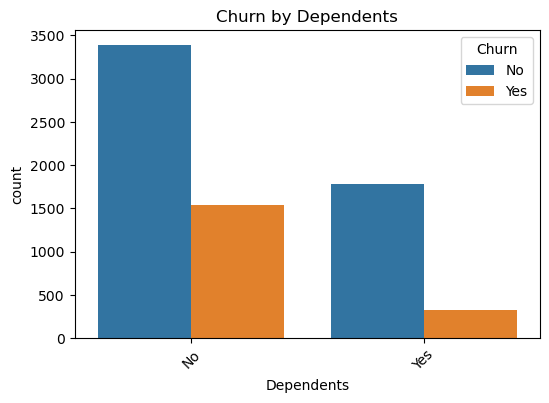

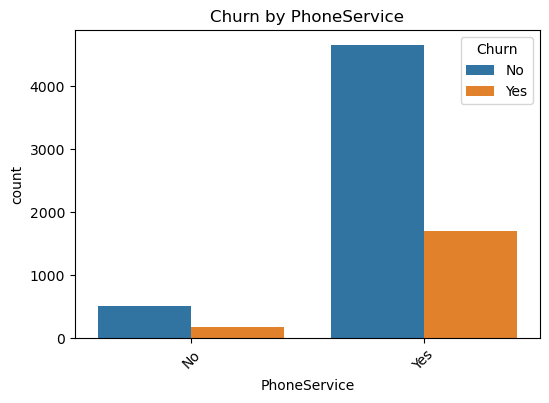

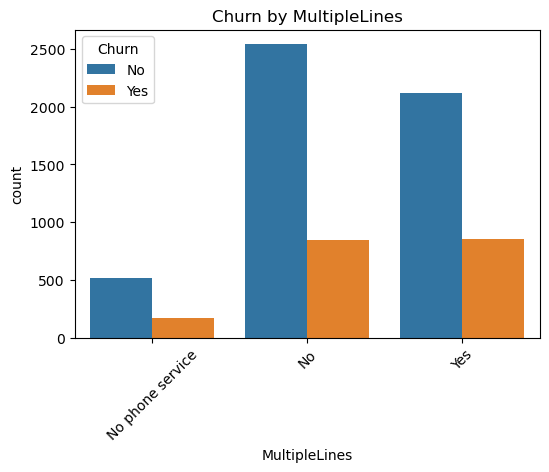

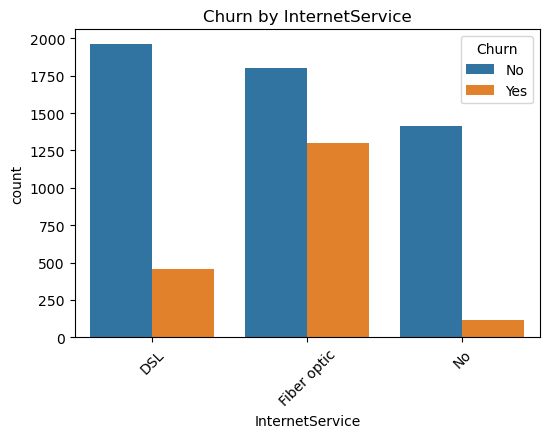

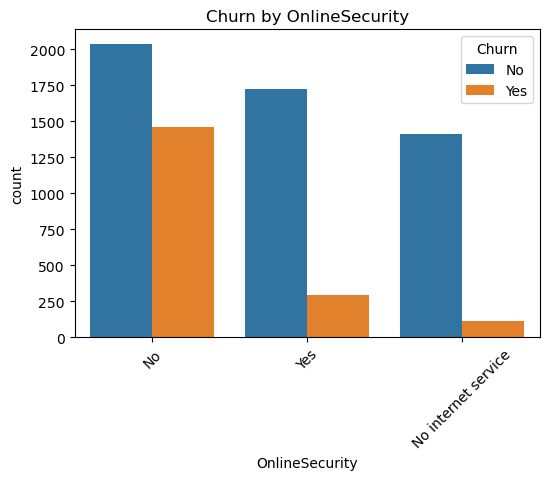

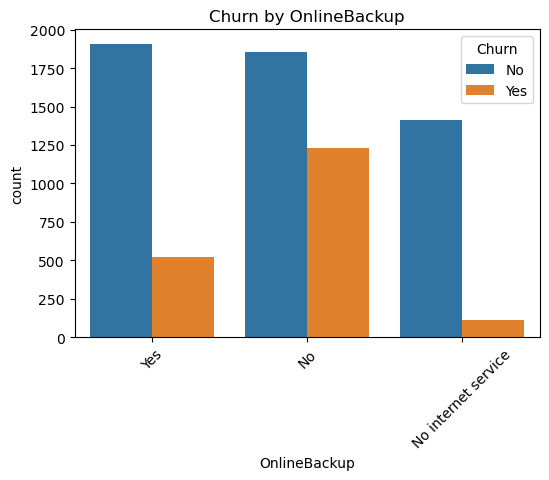

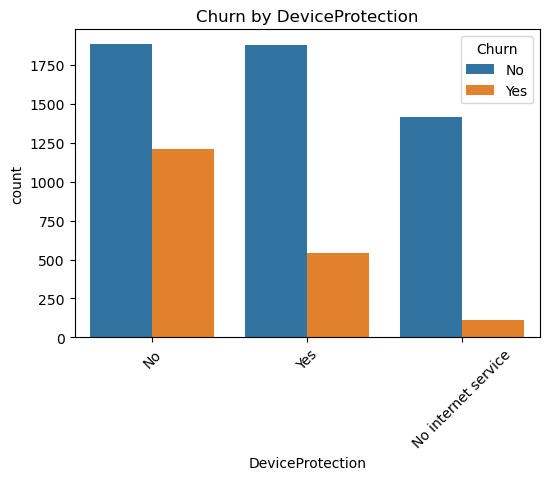

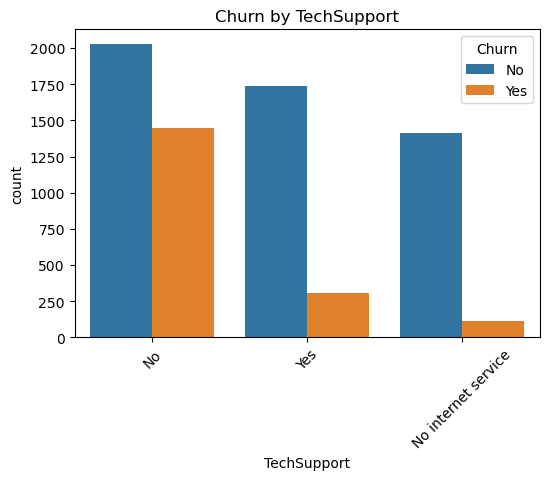

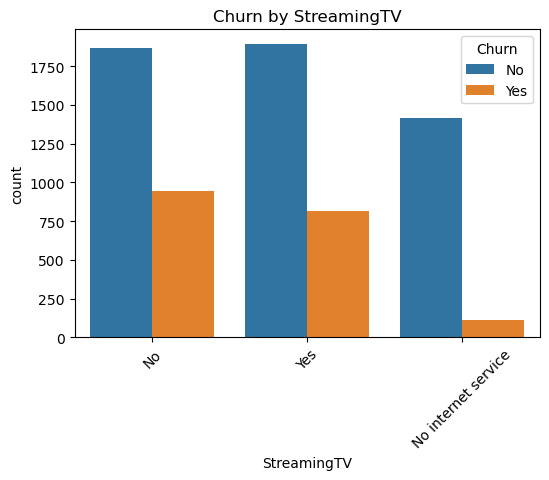

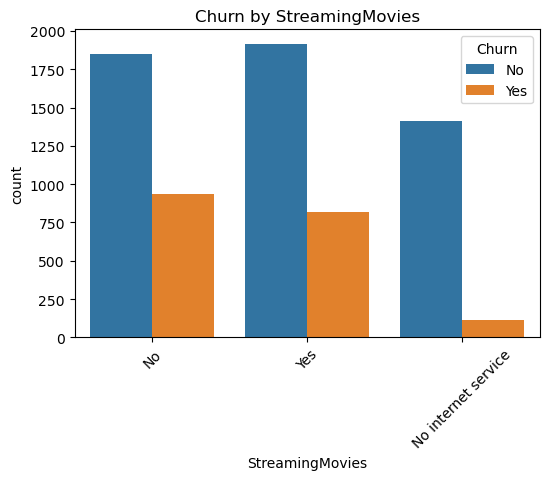

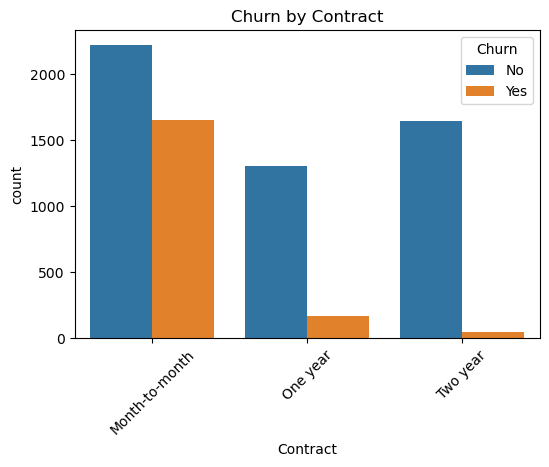

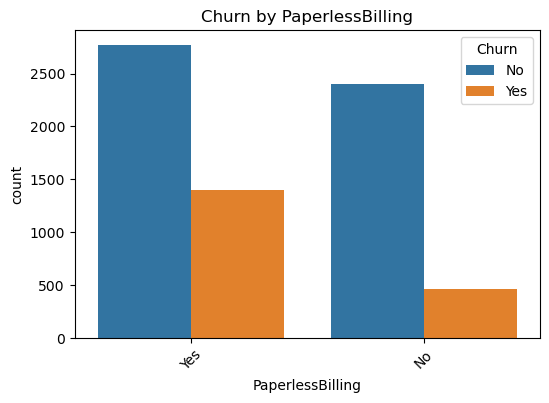

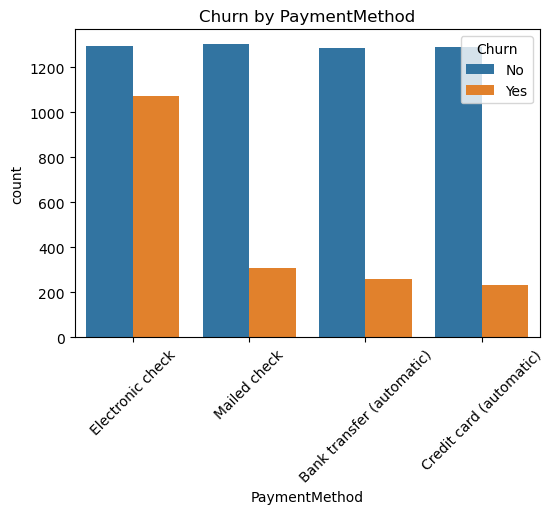

In [69]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('customerID')  # Exclude identifier
categorical_cols.remove('Churn')       # Exclude target

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f"Churn by {col}")
    plt.xticks(rotation=45)
    plt.show()

C:\Users\Rishika sharma\AppData\Local\Temp\ipykernel_7052\3064678776.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col][df['Churn']=='No'], label='No', shade=True)
C:\Users\Rishika sharma\AppData\Local\Temp\ipykernel_7052\3064678776.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col][df['Churn']=='Yes'], label='Yes', shade=True)


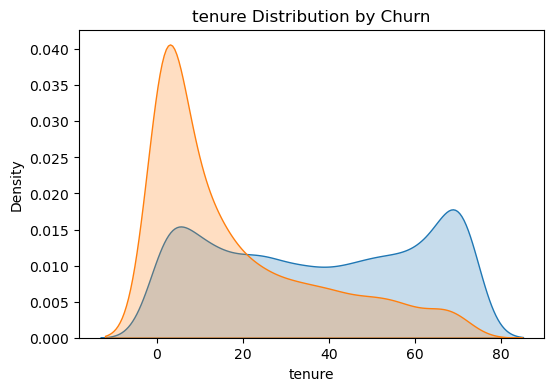

C:\Users\Rishika sharma\AppData\Local\Temp\ipykernel_7052\3064678776.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col][df['Churn']=='No'], label='No', shade=True)
C:\Users\Rishika sharma\AppData\Local\Temp\ipykernel_7052\3064678776.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col][df['Churn']=='Yes'], label='Yes', shade=True)


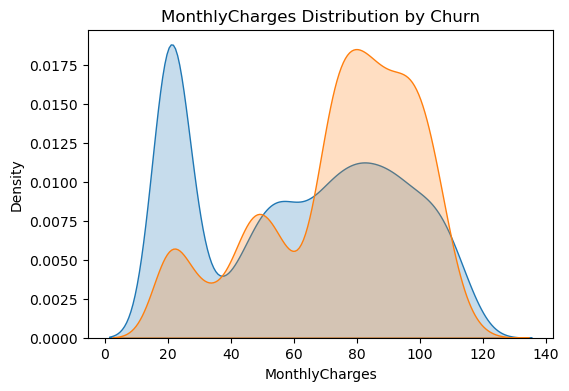

C:\Users\Rishika sharma\AppData\Local\Temp\ipykernel_7052\3064678776.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col][df['Churn']=='No'], label='No', shade=True)
C:\Users\Rishika sharma\AppData\Local\Temp\ipykernel_7052\3064678776.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col][df['Churn']=='Yes'], label='Yes', shade=True)


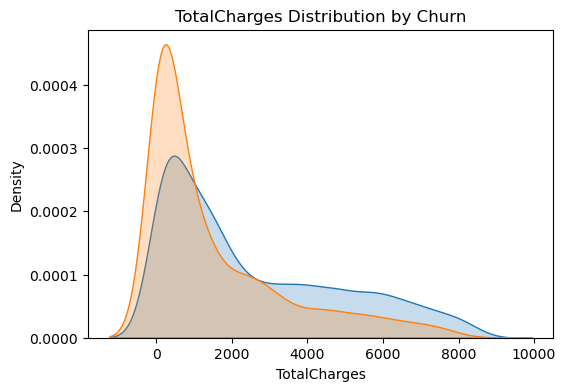

In [70]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('SeniorCitizen') if 'SeniorCitizen' in numerical_cols else None

for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.kdeplot(df[col][df['Churn']=='No'], label='No', shade=True)
    sns.kdeplot(df[col][df['Churn']=='Yes'], label='Yes', shade=True)
    plt.title(f"{col} Distribution by Churn")
    plt.show()


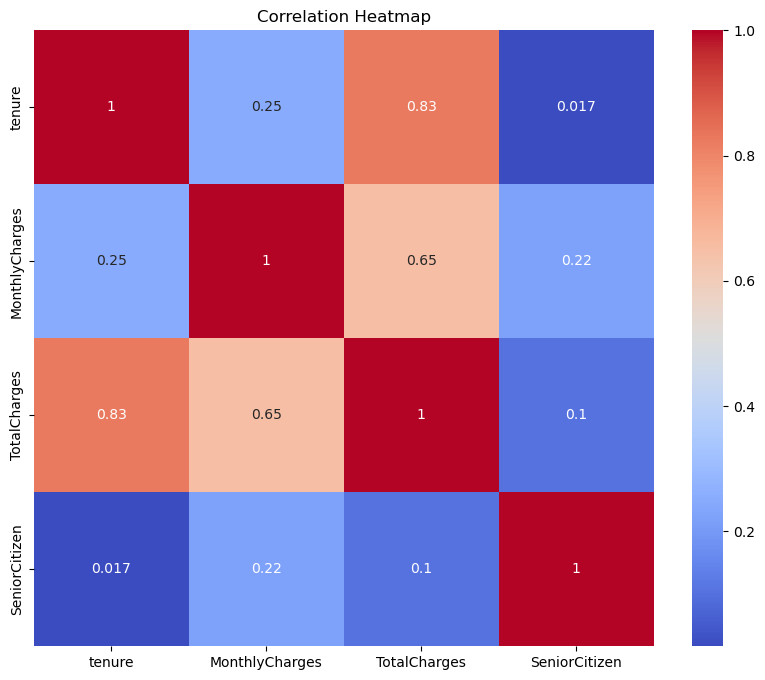

In [71]:
plt.figure(figsize=(10,8))
sns.heatmap(df[numerical_cols + ['SeniorCitizen']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [72]:
from sklearn.model_selection import train_test_split
import pandas as pd
x = df.drop('Churn', axis=1)  
y = df['Churn']
x = pd.get_dummies(x, drop_first=True)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)


In [73]:
#Modelling 

In [83]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),   # handle NaN
    ('scaler', StandardScaler()),                    # scale features
    ('log_reg', LogisticRegression(max_iter=2000, solver='lbfgs'))
])

pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)


In [81]:

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(x_train, y_train)
y_proba_rf = rf.predict_proba(x_test)[:, 1]  

print("🔹 Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))
print(classification_report(y_test, y_pred_rf))


🔹 Random Forest Results
Accuracy: 0.8030518097941802
ROC-AUC: 0.8550117733907817
              precision    recall  f1-score   support

          No       0.83      0.93      0.87      2069
         Yes       0.70      0.46      0.55       749

    accuracy                           0.80      2818
   macro avg       0.76      0.69      0.71      2818
weighted avg       0.79      0.80      0.79      2818



In [95]:
import joblib  
joblib.dump(rf, "CHURN_ANALYSIS.pkl")

print("✅ Model saved successfully as CHURN_ANALYSIS.pkl")


✅ Model saved successfully as CHURN_ANALYSIS.pkl
